<a href="https://colab.research.google.com/github/SehanArandara/DL-Assignment-SLIIT-2024/blob/yasiru_v2/yyasiru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install opendatasets


In [34]:
# Import packages
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
od.download('https://www.kaggle.com/datasets/erdemtaha/cancer-data/data')

Skipping, found downloaded files in "./cancer-data" (use force=True to force download)


In [36]:
# import the CSV

data = pd.read_csv('/content/cancer-data/Cancer_Data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preproccesing

In [37]:
# check the column with null values
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [38]:
# Encode the label of the Y - one hot encoding for categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [39]:
# remove column with null values and id
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [41]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
# check the values are encoded correctly
data['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


## Feature Selecting using the mutual information approach

- I am going to use the SelectKBest so I have to find the best K value
- For that i am going to use the Cross Validation

In [62]:
# define the X and Y
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

X.shape , y.shape ,data.shape


((569, 30), (569,), (569, 31))

In [63]:
# Feature Selecting using the Mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.36672248, 0.0941849 , 0.40339853, 0.35825635, 0.07434242,
       0.21312877, 0.3731004 , 0.44079436, 0.06174009, 0.00509994,
       0.24920334, 0.        , 0.27677662, 0.34209126, 0.01475708,
       0.07456547, 0.11793017, 0.12853994, 0.01298215, 0.03837543,
       0.4567359 , 0.12216209, 0.47873898, 0.46306353, 0.10427266,
       0.2252927 , 0.31749998, 0.43749328, 0.09256379, 0.06823358])

Index(['fractal_dimension_worst', 'symmetry_worst', 'concave points_worst',
       'concavity_worst', 'compactness_worst', 'smoothness_worst',
       'area_worst', 'perimeter_worst', 'texture_worst', 'radius_worst'],
      dtype='object')

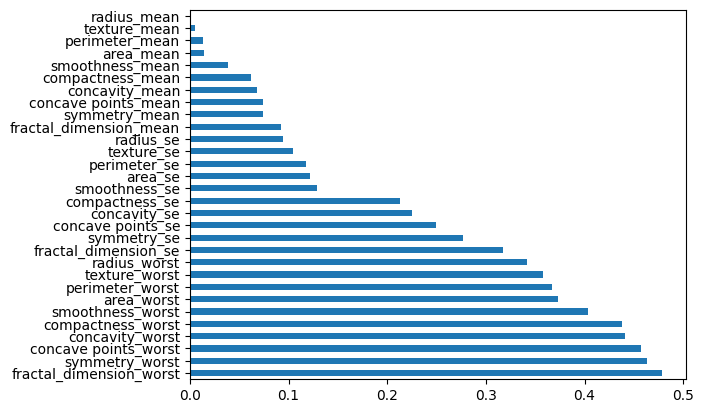

In [72]:
mutual_info = pd.Series(mutual_info, index=X.columns)
mutual_info_sorted = mutual_info.sort_values(ascending=False)

mutual_info_sorted.plot.barh()


top_n_features = mutual_info_sorted.head(10).index
top_n_features


In [76]:
X_best_features = X[top_n_features]
X_best_features.shape
X_best_features.head()

,fractal_dimension_worst,symmetry_worst,concave points_worst,concavity_worst,compactness_worst,smoothness_worst,area_worst,perimeter_worst,texture_worst,radius_worst
0,0.11890,0.4601,0.2654,0.7119,0.6656,0.1622,2019.0,184.60,17.33,25.38
1,0.08902,0.2750,0.1860,0.2416,0.1866,0.1238,1956.0,158.80,23.41,24.99
2,0.08758,0.3613,0.2430,0.4504,0.4245,0.1444,1709.0,152.50,25.53,23.57
3,0.17300,0.6638,0.2575,0.6869,0.8663,0.2098,567.7,98.87,26.50,14.91
4,0.07678,0.2364,0.1625,0.4000,0.2050,0.1374,1575.0,152.20,16.67,22.54


In [77]:
X[top_n_features].head()

,fractal_dimension_worst,symmetry_worst,concave points_worst,concavity_worst,compactness_worst,smoothness_worst,area_worst,perimeter_worst,texture_worst,radius_worst
0,0.11890,0.4601,0.2654,0.7119,0.6656,0.1622,2019.0,184.60,17.33,25.38
1,0.08902,0.2750,0.1860,0.2416,0.1866,0.1238,1956.0,158.80,23.41,24.99
2,0.08758,0.3613,0.2430,0.4504,0.4245,0.1444,1709.0,152.50,25.53,23.57
3,0.17300,0.6638,0.2575,0.6869,0.8663,0.2098,567.7,98.87,26.50,14.91
4,0.07678,0.2364,0.1625,0.4000,0.2050,0.1374,1575.0,152.20,16.67,22.54


## Split the data set

In [82]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.2, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape , data.shape    # All the data are presented

((455, 10), (114, 10), (455,), (114,), (569, 31))

## Setting the model architecture



In [83]:
from tensorflow.keras import layers, models

In [84]:
# Input layer
inputs = layers.Input(shape=(X_train.shape[1],))

# First Dense layer with BatchNormalization, Activation, and Dropout
x = layers.Dense(128, kernel_initializer='he_normal')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.3)(x)

# # Second Dense layer
# x = layers.Dense(64, kernel_initializer='he_normal')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.Dropout(0.3)(x)

# Output layer for binary classification (using sigmoid)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model_mlp = models.Model(inputs, outputs)

# Compile the model with Adam optimizer and binary crossentropy loss
model_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history_mlp = model_mlp.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1331 - loss: 1.2978 - val_accuracy: 0.6228 - val_loss: 1.8521
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1551 - loss: 1.1949 - val_accuracy: 0.6228 - val_loss: 1.0013
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1732 - loss: 1.1809 - val_accuracy: 0.6228 - val_loss: 0.7038
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1723 - loss: 1.0780 - val_accuracy: 0.6667 - val_loss: 0.5952
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2036 - loss: 1.0711 - val_accuracy: 0.8246 - val_loss: 0.5680
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2170 - loss: 0.9837 - val_accuracy: 0.8684 - val_loss: 0.5650
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2617 - loss: 0.9193 - val_accuracy: 0.7982 - val_loss: 0.5714
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3394 - loss: 0.9067 - val_accuracy: 0.7368 - 

In [101]:
model_mlp.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9539 - loss: 0.1453 


[0.15355676412582397, 0.9473684430122375]

In [102]:
y_prediction = model_mlp.predict(X_test)
y_prediction[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.15242422],
       [0.9913054 ],
       [0.8111939 ],
       [0.07569612],
       [0.03535577]], dtype=float32)

In [96]:
y_test[:5]

,diagnosis
204,0
70,1
131,1
431,0
540,0


In [90]:
training_acc =  history_mlp.history['accuracy']
validation_acc = history_mlp.history['val_accuracy']
training_loss = history_mlp.history['loss']
validation_loss = history_mlp.history['val_loss']


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

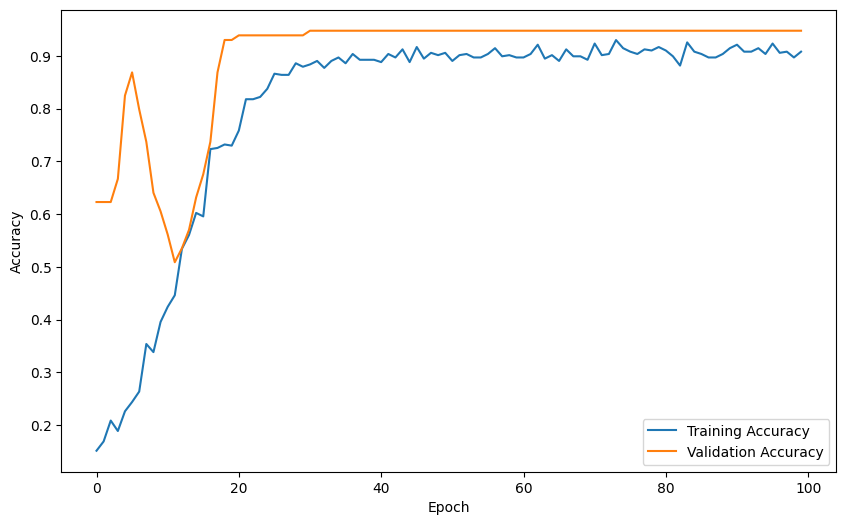

In [93]:
# Plot the Training and validation in accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

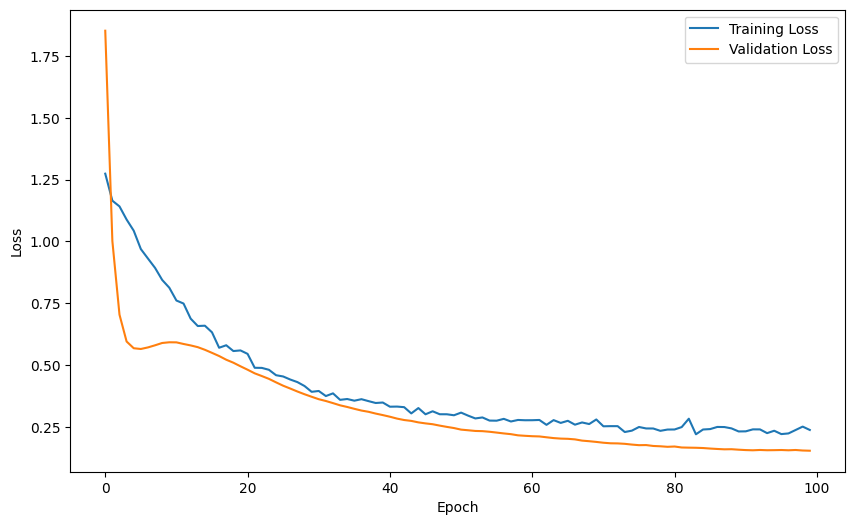

In [95]:
# plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt

## Performance Evaluation

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

y_last_pred = []
for i in y_prediction :
  if i > 0.5 :
    y_last_pred.append(1)
  else :
    y_last_pred.append(0)

print(classification_report(y_test,y_last_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(95.72222222222221, 0.5, 'Truth')

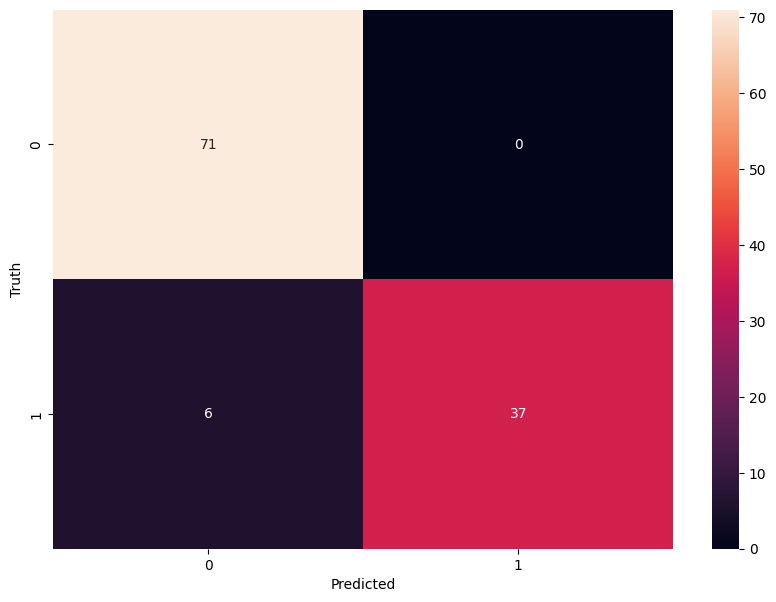

In [104]:
import seaborn as sn

cm = confusion_matrix(y_test,y_last_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')